# Shifted-tilted Tophat at Gaussian interference at waist

The new tophat modes after applying first-order shift and tilt are 

\begin{equation}
	\sum u_{n,m} =
     u_{n,m}
        \left[
        1 + \frac{2 a }{w(z)^2} x + i k \alpha x + i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

For $x$:

\begin{equation}
x u_{n,m} = \frac{w_0}{2}
\Big[
	(1 - i \frac{z}{z_R})
	\sqrt{n+1} u_{n+1,m}
	+
	\sqrt{n}
	(1+i \frac{z}{z_R})
	u_{n-1,m}
\Big]
\end{equation}

For $x^2$:

\begin{equation}
x^2 u_{n,m} = \frac{w_0^2}{4}
\Big[
	(1 - i \frac{z}{z_R})^2
	\sqrt{(n+1)(n+2)} u_{n+2,m}
	+
	(2n+1)
	(1+ (\frac{z}{z_R})^2)
	u_{n,m}
	+
	\sqrt{n(n-1)}
	(1+i \frac{z}{z_R} )^2
	u_{n-2,m}
\Big]
\end{equation}

In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

import scipy.io

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
for x in mat:
  print(x)

__header__
__version__
__globals__
coeftop
read_me_paul
wb


In [3]:
print(mat['read_me_paul'])
print(mat['wb'])

coef=mat['coeftop'].ravel()

['wb is the waist to use for tophat basis with tophat radius 1mm,coeftop are the mode coefficients.']
[[0.00023067]]


Using simtools mode indexing in Python:

$
m = \frac{(N+1)(N+2)}{2}- (A_{python} + 1)
$

$
\rightarrow A_{python} =  \frac{(N+1)(N+2)}{2} + 1 -m 
$

$
n = A_{python} - \frac{N(N+1)}{2} = N-m
$

$
\rightarrow A_{python} = N-m + - \frac{N(N+1)}{2} 
$

$
N = floor( \frac{\sqrt{8A_{python}+1} - 1}{2} ) = ceil(\frac{\sqrt{9+8A_{python}} - 3}{2} )
$

In [4]:
def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes



#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

In [5]:
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 0.00023067,0)

modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)

print(params)
print(plane)


wavelength=1.064e-06
w0=0.00023067
z0=0
Zr=0.15710516963503632
q0=0.15710516963503632j

xmin=-0.002,xmax=0.002,xpoints=300,x step size = 1.3333333333333333e-05
ymin=-0.002,ymax=0.002,ypoints=300,y step size = 1.3333333333333333e-05


In [6]:
f = pl.calculate(params,plane,modes,0)

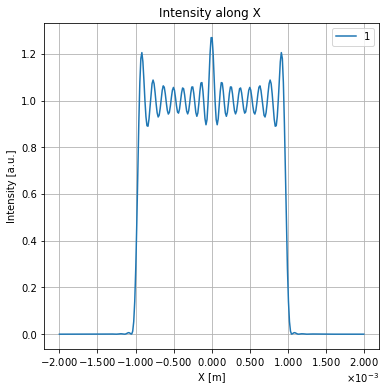

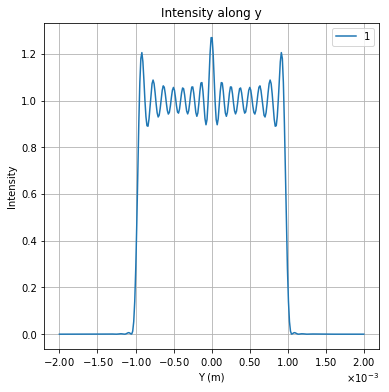

In [7]:
pl.intslicex(0,f)
pl.intslicey(0,f)

In [8]:
pl.show_modes(modes)

n\m [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
0   [0.0005782135489454484, 0.0, 0.00040885861556282983, 0.0, 0.0003540803162272261, 0.0, 0.000323212982065895, 0.0, 0.0003022158047268879, 0.0, 0.0002860296460147838, 0.0, 0.00027094445327376657, 0.0, 0.0002512919866755189, 0.0, 0.00021738092777959212, 0.0, 0.00015798140510481738, 0.0, 7.192607227785025e-05, 0.0, -1.6391805321537432e-05, 0.0, -6.0842902421992335e-05, 0.0, -3.51766787113729e-05, 0.0, 2.2328640904269448e-05, 0.0, 3.720198862288632e-05, 0.0, -4.422997044297867e-06, 0.0, -3.069071621773588e-05]
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
2   [0.00040885861556282983, 0.0, 0.00028910536757333815, 0.0, 0.00025035969936384935, 0.0, 0.0002284536747373153, 0.0, 0.0002131939106897525, 0.0, 0.0002001057403562884, 0.

In [9]:
a = 100e-6
alpha = 0

In [10]:
m0 = pl.scatter_case2(0,params,a,alpha,modes)

In [11]:
f0 = pl.calculate_case2(params,plane,m0,0,a,alpha)


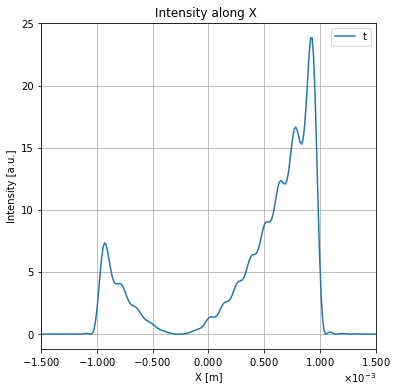

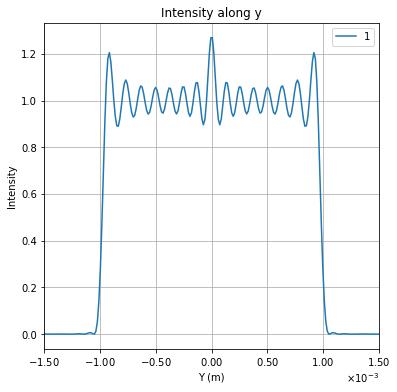

In [12]:
pl.intslicex(0,f0, xlim=[-1.5e-3,1.5e-3], labels="tophat")
pl.intslicey(0,f0, xlim=[-1.5e-3,1.5e-3], labels="tophat")

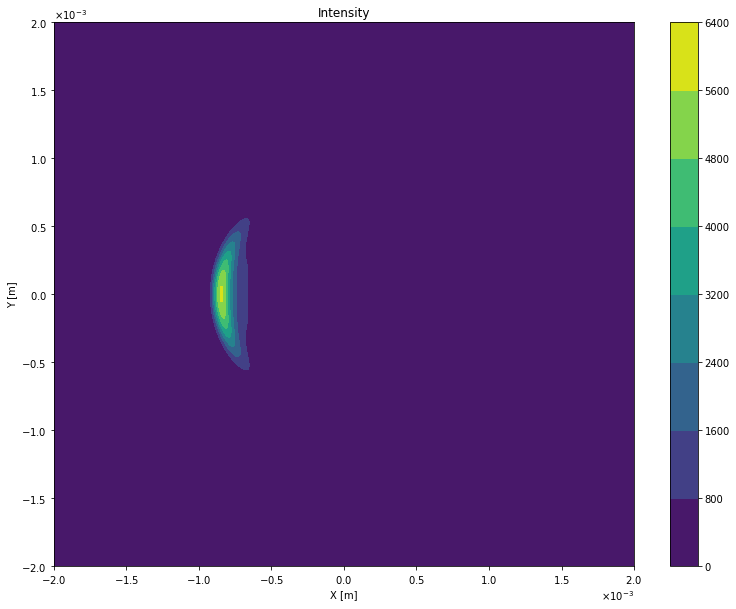

In [13]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f0.plane.getX(), f0.plane.getY(), abs(f0.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [14]:
f0b = pl.calculate(params,plane,m0,0)


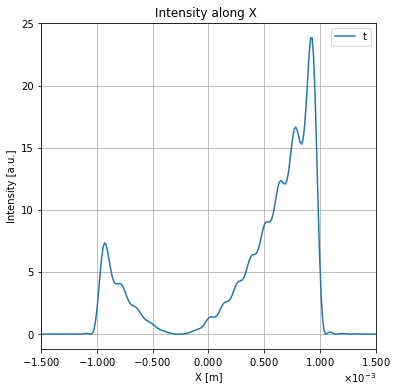

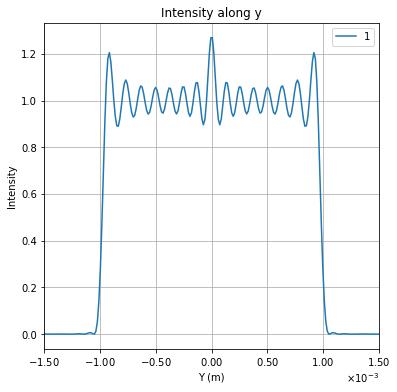

In [15]:
pl.intslicex(0,f0b, xlim=[-1.5e-3,1.5e-3], labels="tophat")
pl.intslicey(0,f0b, xlim=[-1.5e-3,1.5e-3], labels="tophat")

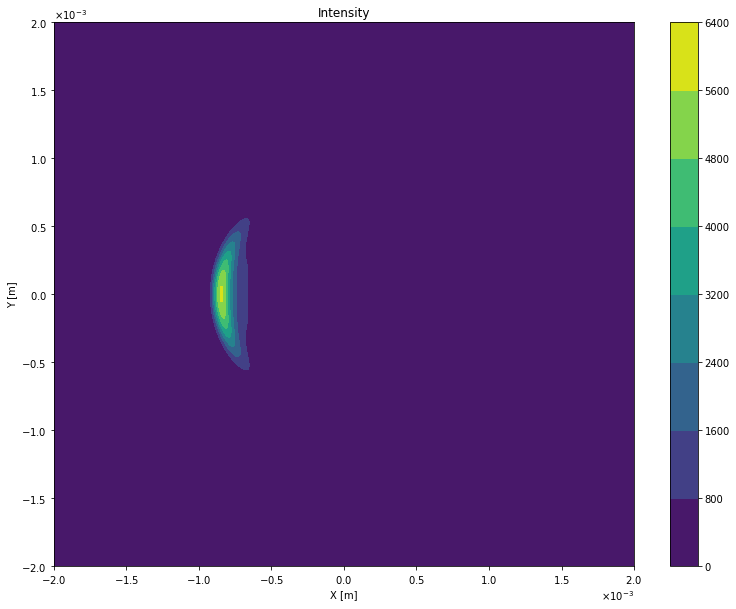

In [16]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f0.plane.getX(), f0.plane.getY(), abs(f0.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [17]:
m = pl.scatter_case2(0,params,0,0,modes)

In [18]:
f = pl.calculate_case2(params,plane,modes_list[100],0,100e-6,500e-6)


NameError: name 'modes_list' is not defined

In [ ]:
print(f.amp.shape)
print(alpha)

In [ ]:
pl.intslicex(0,f, xlim=[-1.5e-3,1.5e-3], labels="alpha")

In [ ]:
print(alpha)

In [ ]:
f = pl.calculate_case2(params,plane,m,0,a,alpha)


In [ ]:
pl.intslicex(0,f, xlim=[-1.5e-3,1.5e-3], labels="alpha")

In [ ]:
pl.show_modes(m)

In [ ]:
pl.show_modes(modes)

### Input Parameters

In [ ]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 100e-6  #100 micron shift
k = 2*pi/lam
#z0 = 0.00023067 # for tophat with 1e-3 radius

#alpha(10nrad)
alpha_min=-500e-6
alpha_max=500e-6
num_points = 101
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

In [ ]:
plt.figure()

plt.plot(plane.getX(),(abs(f.amp))**2)

plt.grid()